In [5]:
import pandas as pd


path_literacy = "shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3D_Literacy and Education_district.xlsx"

df_lit = pd.read_excel(path_literacy)

In [8]:
df_lit.head()
df_lit.columns

Index(['Table 3D.1a: Population 6 years and older by literacy status, sex, type of locality and district',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51'],
      dtype='object')

In [49]:
import pandas as pd

df = pd.read_csv("Literacy_rate.csv", index_col = 0, delimiter=",")
df = df.T


print(f"Number of columns after transposing: {len(df.columns)}")
df.columns = ['Total Literacy', 'Nursery', 'Kindergarden', 'Primary', 'JHS', 'SHS', 'Agriculture', 'Mining', 
              'Manufacturing', 'Electricity', 'Water', 'Construction', 'Wholesale', 
              'Transportation', 'Accommodation', 'Information', 'Financial', 'Real estate', 
              'Professional scientific', 'Administrative', 'Public administration', 
              'Education', 'Human health', 'Arts', 'Other', 'Households']

df = df.replace({',': '', ' ': ''}, regex=True)

df = df.apply(pd.to_numeric, errors='coerce')



df['Literacy_Nursery'] = (df['Nursery'] / df['Total Literacy']) * 100
df['Literacy_Kindergarden'] = (df['Kindergarden'] / df['Total Literacy']) * 100
df['Literacy_Primary'] = (df['Primary'] / df['Total Literacy']) * 100
df['Literacy_JHS'] = (df['JHS'] / df['Total Literacy']) * 100
df['Literacy_SHS'] = (df['SHS'] / df['Total Literacy']) * 100

df['Primary_Sector'] = df['Agriculture'] + df['Mining']
df['Secondary_Sector'] = df['Manufacturing'] + df['Electricity'] + df['Water'] + df['Construction']
df['Tertiary_Sector'] = df['Wholesale'] + df['Transportation'] + df['Accommodation']
df['Quaternary_Sector'] = df['Professional scientific'] + df['Financial']

total_row = df[['Primary_Sector', 'Secondary_Sector', 'Tertiary_Sector', 'Quaternary_Sector']].sum()
total_row.name = 'Total_Sectors'

df.head()





Number of columns after transposing: 26


,Total Literacy,Nursery,Kindergarden,Primary,JHS,SHS,Agriculture,Mining,Manufacturing,Electricity,...,Households,Literacy_Nursery,Literacy_Kindergarden,Literacy_Primary,Literacy_JHS,Literacy_SHS,Primary_Sector,Secondary_Sector,Tertiary_Sector,Quaternary_Sector
All,478682,20879,63758,212003,89637,57210,54991,2205,12464,717,...,773,4.361768,13.319490,44.288902,18.725793,11.951567,57196,20127,22138,3393
Builsa South,13987,622,1915,6127,2758,1905,2190,0,100,3,...,18,4.446986,13.691285,43.804962,19.718310,13.619790,2190,229,351,65
Builsa North Municipal,22728,1145,2854,9175,4534,3779,2861,30,320,22,...,22,5.037839,12.557198,40.368708,19.948962,16.627068,2891,579,777,121
Kasena Nankana Municipal,40245,1846,4921,14476,7004,6433,3506,11,500,67,...,70,4.586905,12.227606,35.969686,17.403404,15.984594,3517,1236,2122,378
Kasena Nankana West,35300,1876,4619,15047,7105,4491,3930,23,362,38,...,60,5.314448,13.084986,42.626062,20.127479,12.722380,3953,707,1066,152


In [50]:

import numpy as np
from sklearn.tree import DecisionTreeRegressor

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

targets = ["Literacy_Nursery", "Literacy_Primary", "Literacy_JS", "Literacy_SS"]


X = df.drop(columns = targets[0])
#X= scaler.fit_transform(X)

y = df[targets[0]]

#y = scaler.fit_transform(y)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso = linear_model.Lasso(alpha=0.5) 
lasso.fit(X, y)

coef = lasso.coef_

#non-0 coefficients, important features
important_features = np.where(coef != 0)[0]  # Getting indices of non-zero coefficients

# Get the names of important features
important_feature_names = X.columns[important_features]

print("Important Features:", important_feature_names)

"""
X_train_reduced = X_train[:, important_features]
X_test_reduced = X_test[:, important_features]

lasso_reduced = Lasso(alpha=0.1)
lasso_reduced.fit(X_train_reduced, y_train)


y_pred = lasso_reduced.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)

"""





Important Features: Index(['Total Literacy', 'Nursery', 'Kindergarden', 'Primary', 'JHS', 'SHS',
       'Agriculture', 'Mining', 'Manufacturing', 'Electricity', 'Construction',
       'Wholesale', 'Transportation', 'Accommodation', 'Information',
       'Financial', 'Professional scientific', 'Administrative',
       'Public administration', 'Education', 'Human health', 'Other',
       'Primary_Sector', 'Secondary_Sector', 'Tertiary_Sector',
       'Quaternary_Sector'],
      dtype='object')


/opt/tljh/user/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.369e-01, tolerance: 3.916e-03
  model = cd_fast.enet_coordinate_descent(


'\nX_train_reduced = X_train[:, important_features]\nX_test_reduced = X_test[:, important_features]\n\nlasso_reduced = Lasso(alpha=0.1)\nlasso_reduced.fit(X_train_reduced, y_train)\n\n\ny_pred = lasso_reduced.predict(X_test_reduced)\nmse = mean_squared_error(y_test, y_pred)\n\n'

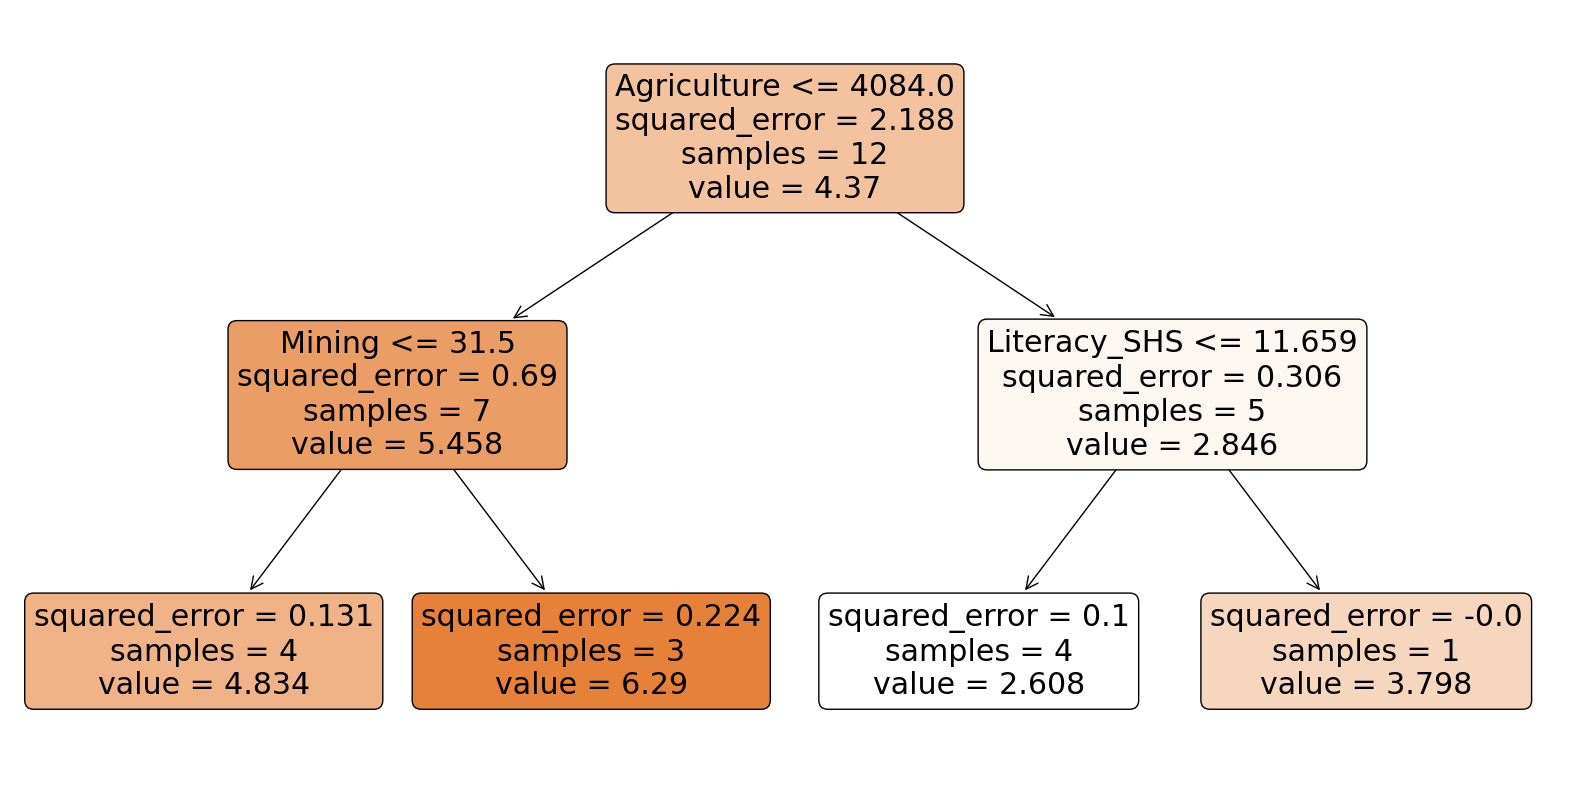

Train Score (R^2): 0.9392462287156219
Test Score (R^2): 0.8781545291339344


In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=targets[1])  # Assuming 'target' is the name of your target variable
y = df[targets[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a regression tree model without pruning (overfitting it)
# Setting max_depth and min_samples_split to None or small values will allow the tree to grow deep
reg_tree = DecisionTreeRegressor(max_depth=2, min_samples_split=2, random_state=42)
reg_tree.fit(X_train, y_train)


plt.figure(figsize=(20, 10))  # Adjust the size for better visualization
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Step 6: Optional - Evaluate the performance on the test set to demonstrate overfitting
y_pred_train = reg_tree.predict(X_train)
y_pred_test = reg_tree.predict(X_test)

train_score = reg_tree.score(X_train, y_train)
test_score = reg_tree.score(X_test, y_test)

print(f"Train Score (R^2): {train_score}")
print(f"Test Score (R^2): {test_score}")